In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from datetime import datetime
plotly.tools.set_credentials_file(username='matiplotly', api_key='0cMZ0jwPT00AfSrq5XZh')
from statsmodels.tsa.api import seasonal_decompose
from sklearn.linear_model import LinearRegression

visa=pd.read_csv('excel/visaF.csv', index_col=['date'], parse_dates=['date'])
series=visa['close']
index=date_range('2008-03-19', periods=2772, freq='D')
df=pd.DataFrame(series, index=index)
data.columns=['close']

In [2]:
visa=pd.read_csv('excel/visaF.csv')
visa.index = pd.to_datetime(visa['date'])
visa=visa['close'].to_frame()

In [3]:
fit1=Holt(visa['close']).fit()

0.9238230375396081
0.5705088934252076


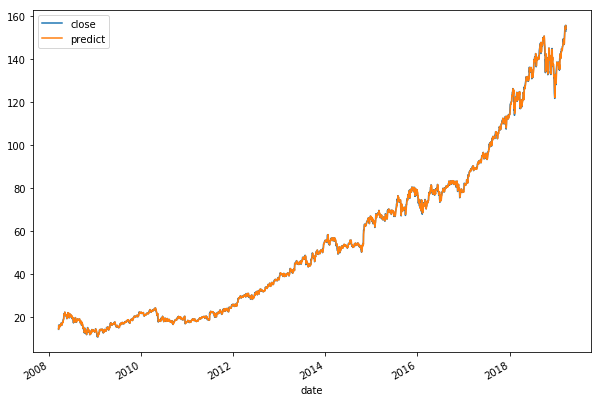

In [4]:
visa['predict']=fit1.fittedvalues
visa.plot(figsize=(10,7))
print(sqrt(mean_squared_error(visa['close'], visa['predict'])))
print(mean_absolute_error(visa['close'], visa['predict']))

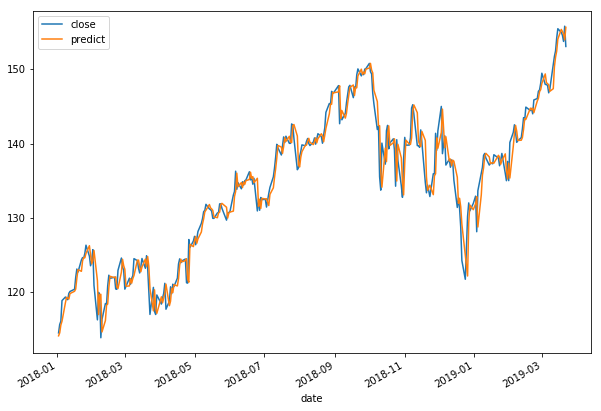

In [5]:
visa['2018-01-01':].plot(figsize=(10,7))

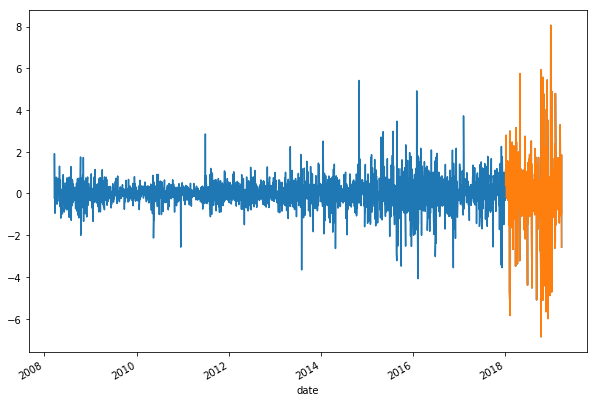

In [6]:
visa['resid']=fit1.resid
visa['resid'].plot(figsize=(10,7))
visa['resid']['2018-01-01':].plot(figsize=(10,7))

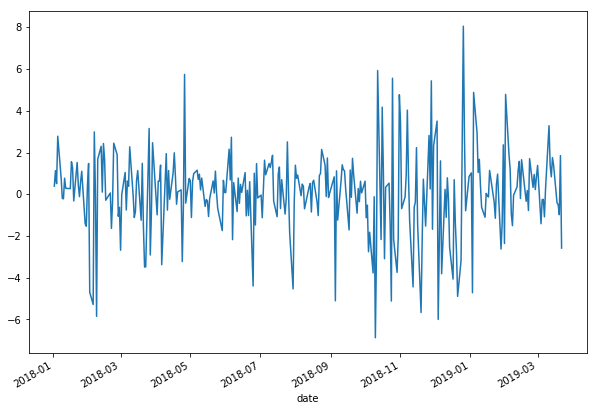

In [7]:
visa['resid']['2018-01-01':].plot(figsize=(10,7))

index=pd.date_range('2019-03-30', periods=4, freq='D')
visaP=pd.DataFrame(fit1.forecast(4), index=index)
visaP.columns['Predict']
visa['close'].plot()
visaP['Predict'].plot()

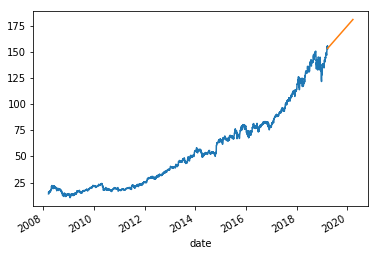

In [8]:
index=pd.date_range('2019-03-22', periods=365, freq='D')

#make a frame from fitForecast and change index to dates instead of row number
fit=fit1.forecast(365).to_frame()
fit.columns=['predict']
fit.index = pd.to_datetime(index)

visa['close'].plot()
fit['predict'].plot()

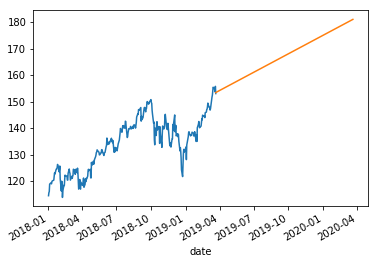

In [9]:
visa['close']['2018-01-01':].plot()
fit['predict'].plot()

In [13]:
trace1 = go.Scatter(
        x = list(visa.index),
        y = list(visa['close']),
        mode = 'lines+markers',
        name = 'Visa closing stock price',
        marker = dict(
                color = 'blue'
                )
        )

trace2 = go.Scatter(
        x = list(fit.index),
        y = list(fit['predict']),
        mode = 'lines+markers',
        name = 'Predicted Closing Price',
        marker = dict(
                color = 'orange'
                )
        )

data = [trace1, trace2]

layout = dict(
    title='Credit card stock prices',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
#added 3year scope
                dict(count=3,
                     label='3y',
                     step='year',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

df = pd.read_excel('http://taanila.fi/linreg1.xlsx')
X=df['Mainoskulut 1000 €'].to_frame() #feature-matriisi X

y=df['Myynti 1000 €'] #target eli selitettävä muuttuja eli y-muuttuja
y

In [11]:
rate = pd.read_csv('excel/rateF.csv')
X=visa['close'].to_frame() #feature-matriisi X
y=rate['Overall Avg. Int.Rate'] #target eli selitettävä muuttuja eli y-muuttuja

In [12]:
malli = LinearRegression()
malli.fit(X,y)

ValueError: Found input variables with inconsistent numbers of samples: [2772, 110]

https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3
https://stackoverflow.com/questions/41535322/setting-freq-of-pandas-datetimeindex-after-dataframe-creation
https://github.com/taanila/kurssi
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
https://stackoverflow.com/questions/20602947/append-column-to-pandas-dataframe
https://stackoverflow.com/questions/26163702/how-to-change-figuresize-using-seaborn-factorplot